In [1]:
import numpy as np
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')

directory = 'drive/MyDrive/ISYE7750/hw2/'

Mounted at /content/drive


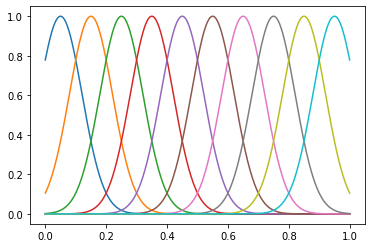

In [2]:
phi = lambda z: np.exp(-z**2)
t = np.linspace(0,1,1000)
N = 10

plt.figure(1)
plt.clf()
for kk in range(N):
  plt.plot(t, phi(N*t - (kk + 1) + 0.5))
plt.savefig(directory + "phi_k_N10.png")

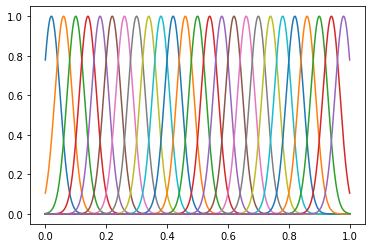

In [ ]:
N = 25

plt.figure(1)
plt.clf()
for kk in range(N):
  plt.plot(t, phi(N*t - (kk + 1) + 0.5))
plt.savefig(directory + "phi_k_N25.png")

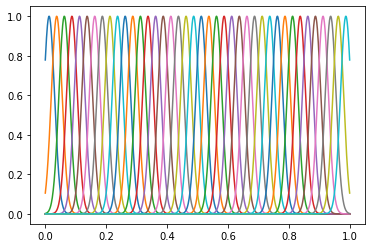

In [ ]:
N = 40

plt.figure(1)
plt.clf()
for kk in range(N):
  plt.plot(t, phi(N*t - (kk + 1) + 0.5))
plt.savefig(directory + "phi_k_N40.png")

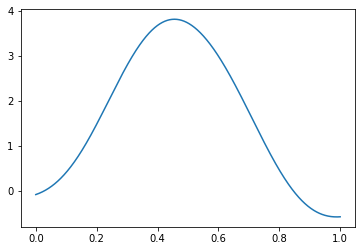

In [4]:
N = 4
a = [-0.5, 3, 2, -1]

y = np.zeros(1000)
for jj in range(N):
  y = y+a[jj]*phi(N*t - (jj + 1) + 0.5)
plt.figure()
plt.plot(t,y)
plt.savefig(directory + "yt_N4.png")

## (C) Code for Submission

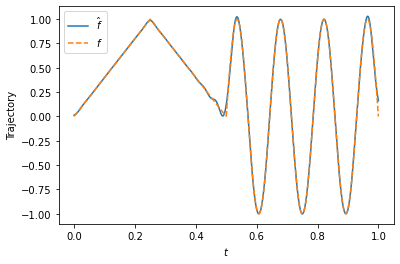

In [16]:
import scipy.integrate as integrate

# Function we want to approximate
f = lambda z: (z < .25)*(4*z) + (z >= 0.25)*(z < 0.5)*(-4*z+2) - (z>= 0.5)*np.sin(14*np.pi*z)

d = 1000  # [0,1] points in b/w

# Basis of Tn
phi = lambda z: np.exp(-z**2)
t = np.linspace(0,1,d)
N = 50  #! CHANGE THIS VALUE
# phi(N*t - (kk + 1) + 0.5)

# We want to find the coefficients "alpha" from the Gram Matrix
## Here we compute the Gram Matrix using inner products of the bases 
G = np.zeros((N,N))
for i in range(N):
  for j in range(N):
    vdv = lambda z: phi(N*z - (i + 1) + 0.5) * phi(N*z - (j + 1) + 0.5)
    G[i,j], _ = integrate.quad(vdv, 0, 1)

## Here we compute the b vector for b = Ga 
b = np.zeros((N,1))
for i in range(N):
  f_phik = lambda z: f(z) * phi(N*z - (i + 1) + 0.5)
  b[i], _ = integrate.quad(f_phik, 0, 1)

## Compute the coefficients 
a = np.linalg.inv(G) @ b

# Plot the approximated trajectory and exact trajectory 
fhat = np.zeros(d)
fex = f(t)
for jj in range(N):  # approx
  fhat = fhat+a[jj]*phi(N*t - (jj + 1) + 0.5)
plt.figure()
plt.plot(t,fhat,'-',label="$\hat{f}$")
plt.plot(t,fex,'--',label="$f$")
plt.legend()
plt.xlabel("$t$")
plt.ylabel("Trajectory")
plt.savefig(directory + "fhat_N"+str(N)+".png")
